<a href="https://colab.research.google.com/github/dmnarula/football-ds-learning/blob/main/week3-visualization/Week3_xGI_vs_GI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

url = "https://raw.githubusercontent.com/olbauday/FPL-Elo-Insights/refs/heads/main/data/2025-2026/By%20Tournament/Premier%20League/GW14/playerstats.csv"
df = pd.read_csv(url)

df.head()

,id,status,chance_of_playing_next_round,chance_of_playing_this_round,now_cost,now_cost_rank,now_cost_rank_type,cost_change_event,cost_change_event_fall,cost_change_start,...,direct_freekicks_text,penalties_text,saves_per_90,clean_sheets_per_90,goals_conceded_per_90,starts_per_90,defensive_contribution_per_90,tackles,clearances_blocks_interceptions,recoveries
0,1,a,NaN,NaN,5.9,94,1.0,0,0.0,4,...,NaN,NaN,1.5,0.57,0.50,1.0,0.00,0,11,111
1,2,a,NaN,NaN,4.2,607,37.0,0,0.0,-3,...,NaN,NaN,0.0,0.00,0.00,0.0,0.00,0,0,0
2,3,u,0.0,0.0,4.0,649,56.0,0,0.0,0,...,NaN,NaN,0.0,0.00,0.00,0.0,0.00,0,0,0
3,4,a,NaN,NaN,3.9,736,87.0,0,0.0,-1,...,NaN,NaN,0.0,0.00,0.00,0.0,0.00,0,0,0
4,5,i,0.0,0.0,6.3,72,2.0,0,0.0,3,...,NaN,NaN,0.0,0.64,0.45,1.0,9.09,12,88,15


In [8]:
df_small = df[[
    "id",
    "web_name",
    "minutes",
    "goals_scored",
    "assists",
    "expected_goals",
    "expected_assists",
    "expected_goal_involvements",
    "expected_goals_conceded",
    "defensive_contribution_per_90",
    "starts",
    "yellow_cards",
    "red_cards",
    "saves",
    "penalties_missed",
    "goals_conceded",
    "own_goals",
    "clean_sheets"
]].copy()

df_small.head()

,id,web_name,minutes,goals_scored,assists,expected_goals,expected_assists,expected_goal_involvements,expected_goals_conceded,defensive_contribution_per_90,starts,yellow_cards,red_cards,saves,penalties_missed,goals_conceded,own_goals,clean_sheets
0,1,Raya,1260,0,0,0.00,0.04,0.04,7.38,0.00,14,1,0,21,0,7,0,8
1,2,Arrizabalaga,0,0,0,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0
2,3,Hein,0,0,0,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0
3,4,Setford,0,0,0,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0
4,5,Gabriel,990,1,2,0.82,0.69,1.51,6.17,9.09,11,1,0,0,0,5,0,7


In [19]:
df_small["GI"] = df_small["goals_scored"] + df_small["assists"]

df_small = df_small.rename(columns={
    "expected_goal_involvements": "xGI",
})


df_small[["web_name", "GI", "xGI", "minutes"]]

,web_name,GI,xGI,minutes
0,Raya,0,0.04,1260
1,Arrizabalaga,0,0.00,0
2,Hein,0,0.00,0
3,Setford,0,0.00,0
4,Gabriel,3,1.51,990
...,...,...,...,...
753,Hee Chan,1,0.99,413
754,André,0,0.37,973
755,Cox,0,0.00,0
756,Fitzgerald,0,0.00,0


In [24]:
df_clean = df_small[df_small["minutes"] >= 300].copy()

df_clean.shape

(314, 19)

In [26]:
import matplotlib.pyplot as plt

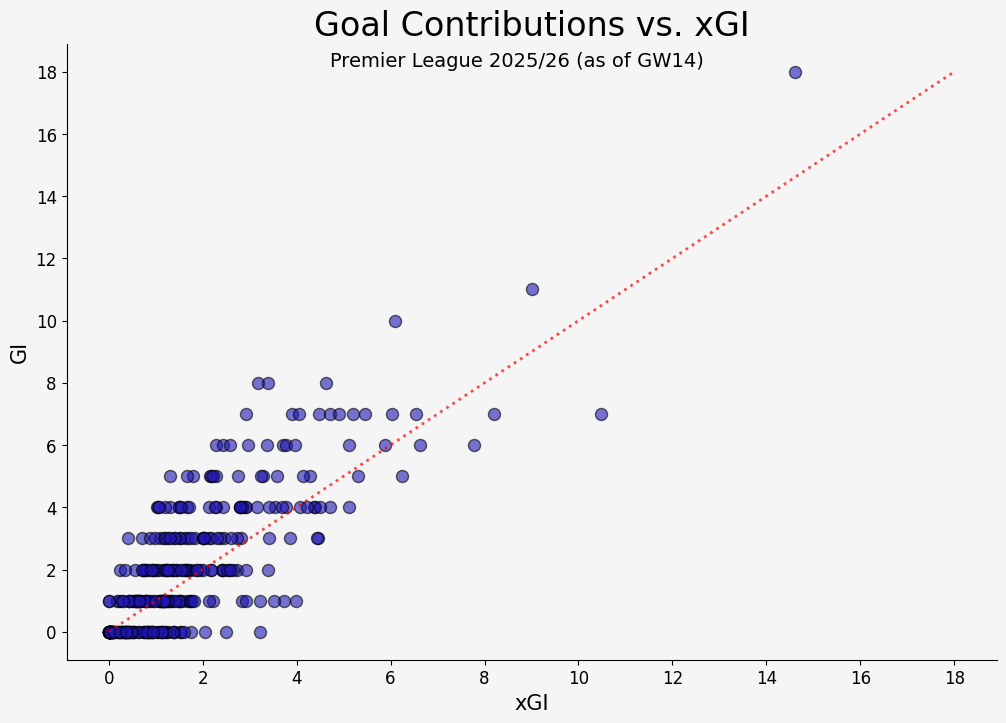

In [119]:
# Making scatter plot

# Size
plt.figure(figsize=(12,8), facecolor="#f5f5f5")

# Scatter plot
plt.scatter(
    df_clean["xGI"],
    df_clean["GI"],
    alpha=0.6,
    s=75,
    edgecolor="black",
    c="#1f17b3"
)

# Diagonal line
max_val = max(df_clean["xGI"].max(), df_clean["GI"].max())
plt.plot([0, max_val], [0, max_val],
         color="red",
         linestyle=":",
         linewidth=2,
         alpha=0.7,
         solid_capstyle="round"
         )

# Labels
plt.xlabel("xGI", fontsize=15)
plt.ylabel("GI", fontsize=15)
plt.title("Goal Contributions vs. xGI", fontsize=24)
plt.suptitle("Premier League 2025/26 (as of GW14)", fontsize=14, y=0.87)

# Axes
ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_facecolor("#f5f5f5")

# Axis increment
plt.xticks(range(0, int(max_val)+1, 2), fontsize=12)
plt.yticks(range(0, int(max_val)+1, 2), fontsize=12)





plt.show()